## Predecting  Life expectancy with Simple Linear Regression


In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib.gridspec import GridSpec
from sklearn import linear_model

In [217]:
#reading the file
df=pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [181]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [182]:
df2 = df[(df.Year==2015)]

In [183]:
df2=df2[['Life expectancy ','Adult Mortality', 'GDP']]

In [184]:
df2.head()

,Life expectancy,Adult Mortality,GDP
0,65.0,263.0,584.259210
16,77.8,74.0,3954.227830
32,75.6,19.0,4132.762920
48,52.4,335.0,3695.793748
64,76.4,13.0,13566.954100


In [185]:
df2.isna().sum()

Life expectancy      0
Adult Mortality      0
GDP                 29
dtype: int64

In [186]:
df2=df2.dropna()

In [187]:
df2['natural_log_GDP'] = np.log(df2['GDP'])

In [188]:
df2=df2[['Life expectancy ','Adult Mortality', 'natural_log_GDP']]

In [189]:
df2.describe()

,Life expectancy,Adult Mortality,natural_log_GDP
count,154.000000,154.000000,154.000000
mean,71.690260,149.922078,7.823933
std,8.280789,98.460870,1.601032
min,51.000000,1.000000,3.516941
25%,66.125000,72.500000,6.641157
50%,73.950000,131.000000,7.977962
75%,77.075000,208.000000,8.893992
max,88.000000,484.000000,11.102647


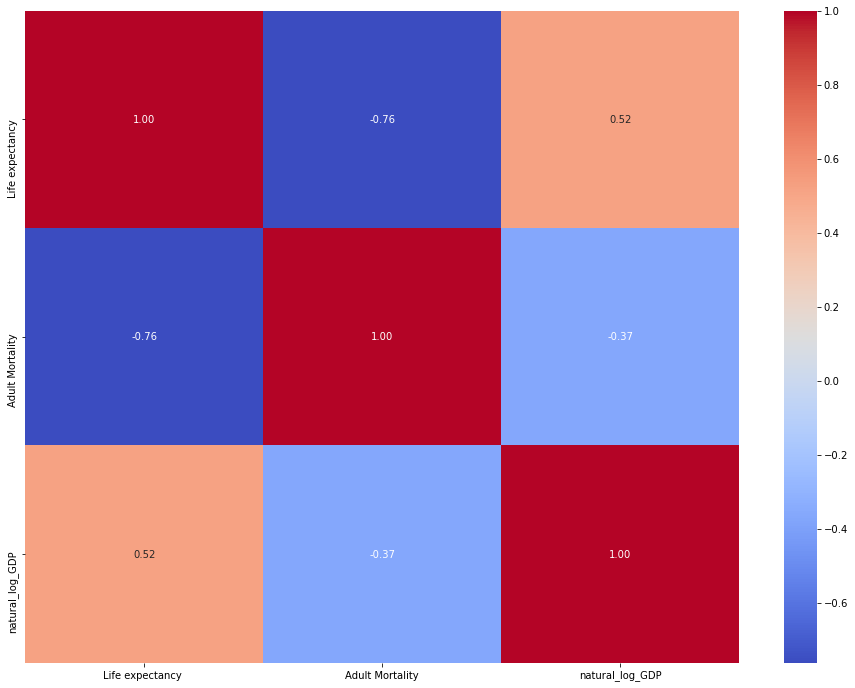

In [190]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df2.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

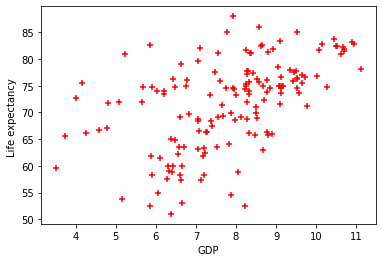

In [191]:
%matplotlib inline
plt.xlabel('GDP')
plt.ylabel('Life expectancy ')
plt.scatter(df2['natural_log_GDP'],df2['Life expectancy '] ,color='red',marker='+')

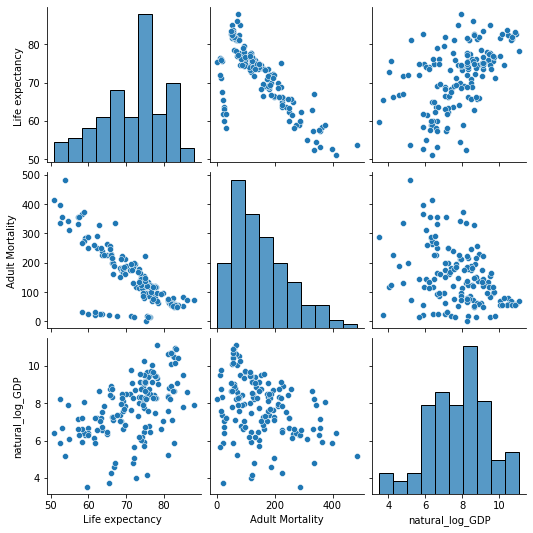

In [192]:
sns.pairplot(df2)

In [193]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 2922
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Life expectancy   154 non-null    float64
 1   Adult Mortality   154 non-null    float64
 2   natural_log_GDP   154 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [194]:
# distirbution is suitable for limnear model
x=df2[['natural_log_GDP']]
y=df2['Life expectancy ']
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [195]:
 r_sq = reg.score(x, y)
b=reg.coef_

In [196]:
print('coefficient of determination:', r_sq)
print('intercept:',reg.intercept_)
print('slope:', reg.coef_)

coefficient of determination: 0.2712415453633724
intercept: 50.61489861795945
slope: [2.69370414]


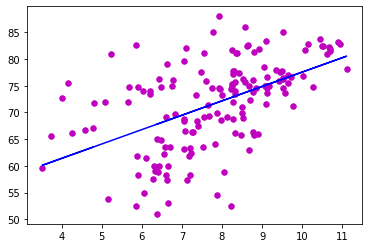

In [197]:

    # plotting the actual points as scatter plot
plt.scatter(x, y, color = "m",
             marker = "o", s = 30)
plt.plot(x,reg.predict(x),color='blue')  


In [198]:
#predecting the house with area of 3300
reg.predict([[8]])

array([72.16453175])

In [202]:
## multivariable regression

In [205]:
#using regression analysis model for predecting prices


# Set X and y for before splitting into train test data
X = df2.drop(columns = ['Life expectancy '])
y = df2['Life expectancy ']

# Import scikit learn
from sklearn.model_selection import train_test_split

# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [206]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [207]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [208]:
# Importing Linear Regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Fitting the model
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_)

71.40654205607477


In [209]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Adult Mortality,-5.273774
natural_log_GDP,2.751805


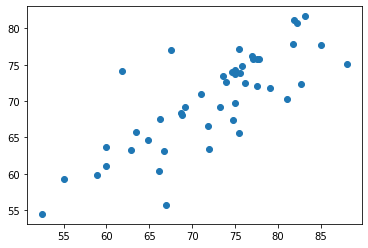

In [210]:
# Predicting the price for the test value
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred)

In [211]:
# Importing metrics for model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [212]:
# Calculate mMean squuare error
mse = mean_squared_error(y_test, y_pred)

In [213]:
# Calculate R square value
r2 = r2_score(y_test, y_pred)

In [214]:
print('Mean squared error : ', mse)
print('r square : ', r2)

Mean squared error :  28.432885064743164
r square :  0.5491302866292347


In [215]:
# Intercept and coeff of the line
print('Intercept of the model : ', lr.intercept_)
print('Coefficient of the line : ', lr.coef_)

Intercept of the model :  71.40654205607477
Coefficient of the line :  [-5.27377379  2.75180489]
